<a href="https://colab.research.google.com/github/pythontrade/apitesting/blob/master/US_Money_Markets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from datetime import date
import matplotlib.pyplot as plt 

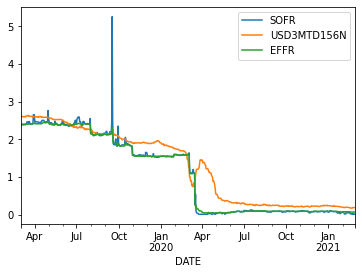

In [33]:
start = date(2019, 3, 1 ) 
end = date(2021, 3, 1)
sofr = pdr.get_data_fred('SOFR', start, end) 
libor3m = pdr.get_data_fred('USD3MTD156N', start, end) 
fedfunds = pdr.get_data_fred('EFFR', start, end) 

df = pd.concat([sofr, libor3m, fedfunds], axis=1)
df.resample('D').last().fillna(method='ffill').plot()

Text(0, 0.5, 'Volume USD Billions')

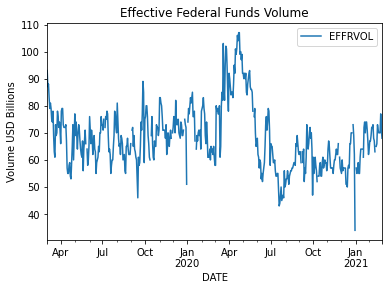

In [32]:
ffvolume = pdr.get_data_fred('EFFRVOL', start, end) 
ax=ffvolume.plot(title='Effective Federal Funds Volume')
ax.set_ylabel('Volume USD Billions')
  

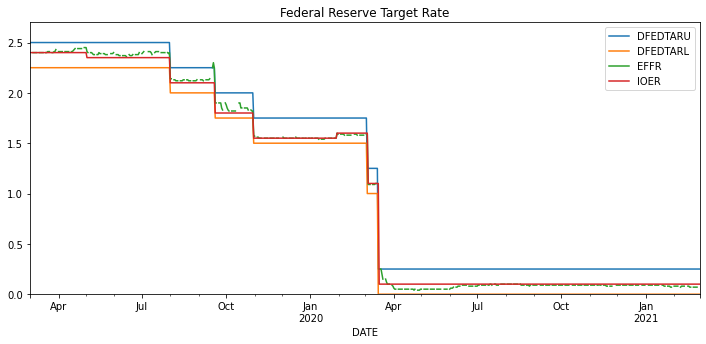

In [50]:
FFUpper = pdr.get_data_fred('DFEDTARU', start, end) 
FFLower = pdr.get_data_fred('DFEDTARL', start, end) 
FFEff = pdr.get_data_fred('EFFR', start, end) 
IOER = pdr.get_data_fred('IOER', start, end)

ax=pd.concat([FFUpper, FFLower, FFEff, IOER], axis=1).plot(title='Federal Reserve Target Rate', figsize=(12,5), ylim=[0,2.7])

,SOFR,DTB3
DATE,,
2020-04-01,0.01,0.09
2020-04-02,0.01,0.09
2020-04-03,0.01,0.10
2020-04-06,0.01,0.15
2020-04-07,0.01,0.14
...,...,...
2021-02-23,0.01,0.04
2021-02-24,0.02,0.03
2021-02-25,0.03,0.04


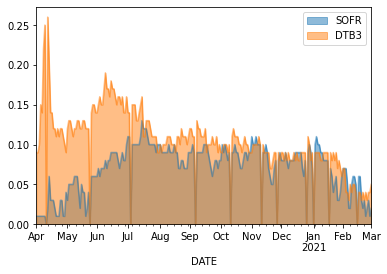

In [14]:
start = "2020-04-01"
end = "2021-03-01"

TBill3m = pdr.get_data_fred('DTB3', start, end) 
SOFR = pdr.get_data_fred('SOFR', start, end) 
df = pd.concat([SOFR, TBill3m], axis=1)
df.plot(kind='area', stacked=False)
df

In [25]:
!git clone https://github.com/pythontrade/apitesting.git

Cloning into 'apitesting'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 15 (delta 4), reused 6 (delta 2), pack-reused 0
Unpacking objects: 100% (15/15), done.


In [28]:
df = pd.read_csv(r'apitesting/gcfindex.csv')

In [30]:
df.Date = pd.to_datetime(df.Date)

In [32]:
df = df.set_index('Date')

In [35]:
df.columns = [x.replace(' ','') for x in df.columns]

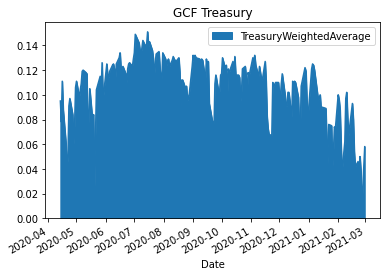

In [47]:
df1= df.iloc[30:,-1:]
df1.plot(secondary_y='TreasuryTotalPARValue', kind='area', title='GCF Treasury')

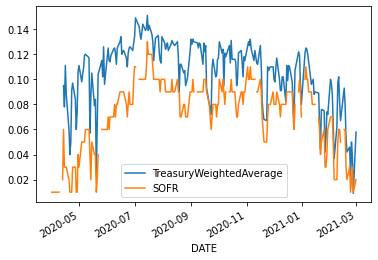

In [51]:
ax=df1.plot()
SOFR.plot(ax=ax)